# Notebook 5: Optimization for Machine Learning

## Learning Objectives
- Understand convex vs non-convex optimization
- Learn gradient descent and its variants
- Explore loss functions used in ML
- Understand and implement regularization
- Apply optimization in practical examples

We bridge calculus from Notebook 4 to real ML training algorithms.

## 1. Convex vs Non-Convex Optimization
**Convex function:** A function \(f(x)\) where the line segment between any two points lies above the curve.

**Why it matters:** In convex problems, any local minimum is also the global minimum — gradient descent is easier.

**Non-convex:** Multiple local minima and saddle points — common in deep learning.

### Visual intuition

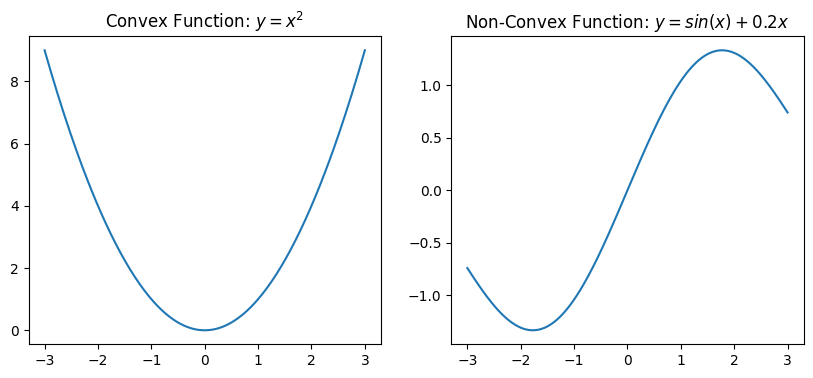

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 200)
convex_y = x**2
nonconvex_y = np.sin(x) + 0.2*x

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, convex_y)
plt.title('Convex Function: $y = x^2$')

plt.subplot(1,2,2)
plt.plot(x, nonconvex_y)
plt.title('Non-Convex Function: $y = sin(x) + 0.2x$')
plt.show()

## 2. Gradient Descent Algorithm

**Update rule:**
\[ w := w - \eta \nabla_w L(w) \]

- \(w\): parameters
- \(\eta\): learning rate
- \(L(w)\): loss function

**Variants:**
- Batch Gradient Descent
- Stochastic Gradient Descent (SGD)
- Mini-batch Gradient Descent

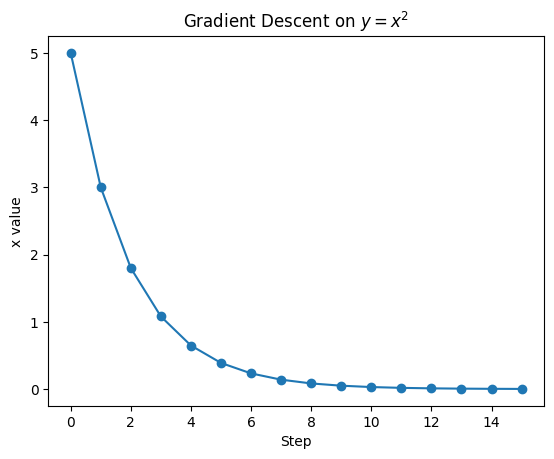

In [2]:
# Simple Gradient Descent on y = x^2
def gradient_descent(lr=0.1, steps=20):
    x = 5.0  # start point
    history = [x]
    for _ in range(steps):
        grad = 2*x  # derivative of x^2
        x -= lr * grad
        history.append(x)
    return history

history = gradient_descent(lr=0.2, steps=15)
plt.plot(history, marker='o')
plt.title('Gradient Descent on $y = x^2$')
plt.xlabel('Step')
plt.ylabel('x value')
plt.show()

## 3. Loss Functions in ML

### Regression
- Mean Squared Error (MSE): \( \frac{1}{n}\sum (y - \hat{y})^2 \)
- Mean Absolute Error (MAE)

### Classification
- Binary Cross-Entropy: \( -\frac{1}{n}\sum y\log(\hat{y}) + (1-y)\log(1-\hat{y}) \)
- Categorical Cross-Entropy

Loss choice impacts optimization surface.

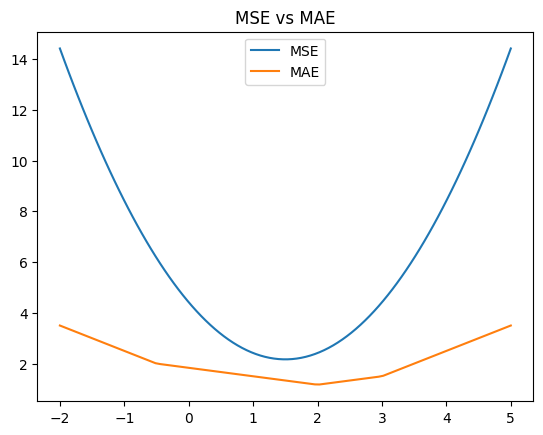

In [3]:
# Visualizing MSE vs MAE surfaces for a simple dataset
y_true = np.array([3.0, -0.5, 2.0])
y_preds = np.linspace(-2, 5, 100)
mse = [(y_true - yp)**2 for yp in y_preds]
mae = [np.abs(y_true - yp) for yp in y_preds]

plt.plot(y_preds, np.mean(mse, axis=1), label='MSE')
plt.plot(y_preds, np.mean(mae, axis=1), label='MAE')
plt.legend()
plt.title('MSE vs MAE')
plt.show()

## 4. Regularization

### Why?
- Prevent overfitting
- Penalize large weights

### Types:
- L1 (Lasso): Encourages sparsity, penalty = \( \lambda \sum |w| \)
- L2 (Ridge): Encourages small weights, penalty = \( \lambda \sum w^2 \)

In [4]:
# Example: Adding L2 regularization to MSE
def mse_with_l2(y_true, y_pred, weights, lam=0.1):
    mse = np.mean((y_true - y_pred)**2)
    l2_penalty = lam * np.sum(weights**2)
    return mse + l2_penalty

# Dummy example
y_true = np.array([3, 2, 4])
y_pred = np.array([2.5, 2.2, 3.8])
weights = np.array([0.5, -0.3])
mse_with_l2(y_true, y_pred, weights)

np.float64(0.14400000000000004)

## 5. Exercise
**Task:** Implement stochastic gradient descent (SGD) for a simple linear regression problem without using sklearn.

**Dataset:** Generate your own synthetic data with noise.

**Steps:**
1. Initialize weights randomly.
2. Loop over epochs:
    - Shuffle data
    - For each sample, compute gradient and update weights
3. Track loss over time and plot.

In [5]:
# Your turn!
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# TODO: Implement SGD here
lr = 0.1
epochs = 50
w = np.random.randn(1)
b = np.random.randn(1)
losses = []

# Fill in loop
